<a href="https://colab.research.google.com/github/pauladel/DS3001-Project/blob/main/Data_Wrangling_EDA__natural_disaster_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/pauladel/DS3001-Project/refs/heads/main/raw-data/us_disaster_declarations.csv',low_memory=False)

In [4]:
print( df.shape, '\n') # 64092 observations, 23 variables
print( df.head(), '\n')

(64092, 23) 

  fema_declaration_string  disaster_number state declaration_type  \
0                 DR-1-GA                1    GA               DR   
1                 DR-2-TX                2    TX               DR   
2                 DR-3-LA                3    LA               DR   
3                 DR-4-MI                4    MI               DR   
4                 DR-5-MT                5    MT               DR   

       declaration_date  fy_declared incident_type         declaration_title  \
0  1953-05-02T00:00:00Z         1953       Tornado                   Tornado   
1  1953-05-15T00:00:00Z         1953       Tornado  Tornado & Heavy Rainfall   
2  1953-05-29T00:00:00Z         1953         Flood                     Flood   
3  1953-06-02T00:00:00Z         1953       Tornado                   Tornado   
4  1953-06-06T00:00:00Z         1953         Flood                    Floods   

   ih_program_declared  ia_program_declared  ...     incident_end_date  \
0               

In [6]:
print(pd.crosstab(df['state'],df['incident_type']),'\n')
print(pd.crosstab(df['state'],df['incident_type'], normalize = 'all'),'\n')
#gives us a view of the types of disasters per state and number of disasters in each

incident_type  Biological  Chemical  Coastal Storm  Dam/Levee Break  Drought  \
state                                                                          
AK                    121         0              2                0        0   
AL                    139         0              0                0       67   
AR                    152         0              0                0       32   
AS                     10         0              0                0        5   
AZ                     73         0              0                0        8   
CA                    116         0             43                5       47   
CO                    132         0             64                1       42   
CT                     21         0              0                0        0   
DC                      2         0              0                0        0   
DE                      6         0              1                0        3   
FL                    150         0     

<Axes: xlabel='incident_type', ylabel='Count'>

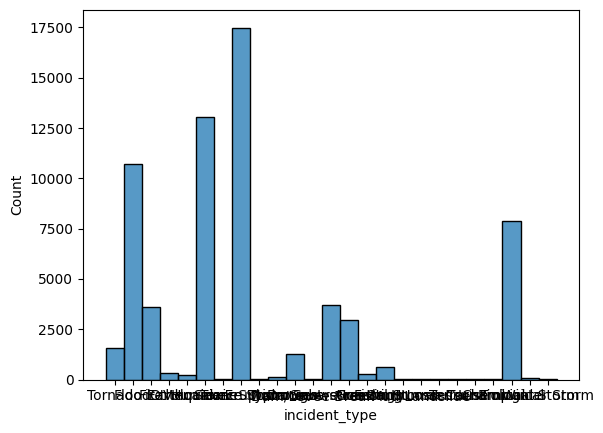

In [7]:
sns.histplot(df['incident_type'])
#This is a pretty crowded chart, so let's reduce the number of values we are taking account of

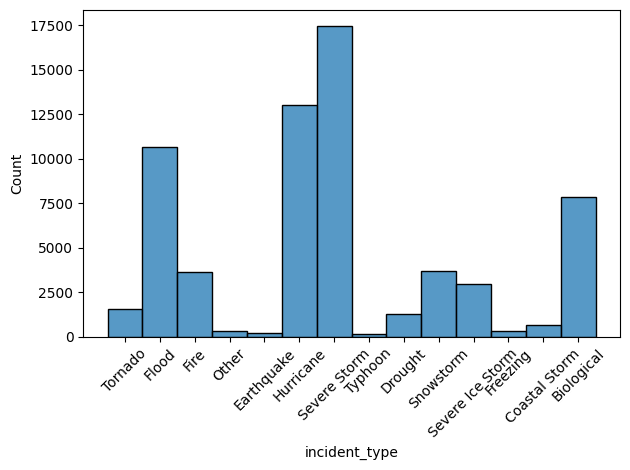

In [12]:
incident_counts = df['incident_type'].value_counts()

# Filter out incident types with fewer than 100 occurrences
filtered_df = df[df['incident_type'].isin(incident_counts[incident_counts >= 100].index)]

# Plot the filtered data
sns.histplot(filtered_df['incident_type'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

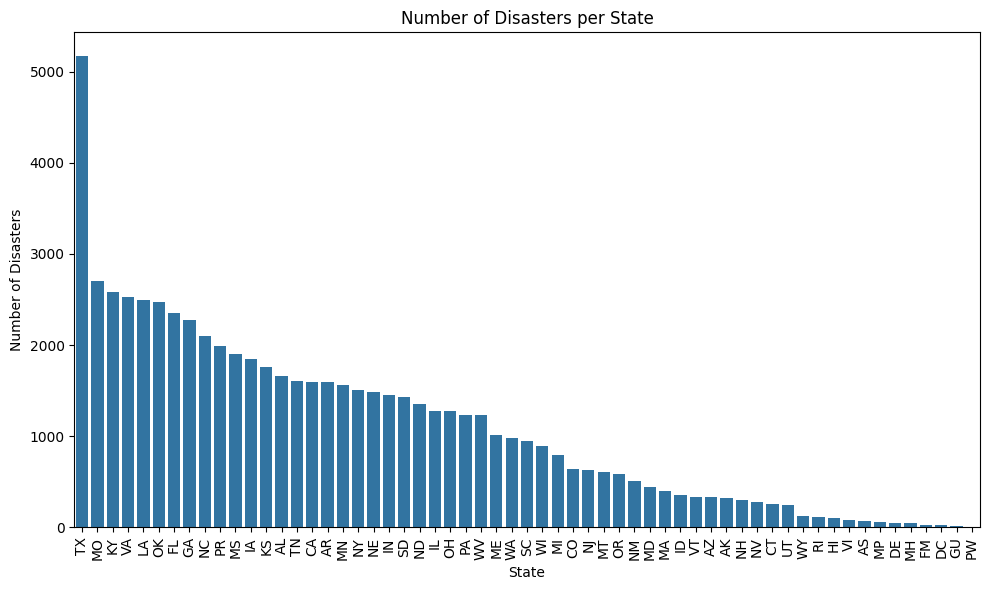

In [14]:
disasters_per_state = df['state'].value_counts()

# Plot the number of disasters per state using a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=disasters_per_state.index, y=disasters_per_state.values)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()
#Clearly texas has an incredibly high number of disasters compare to other states.
#This dataset solely shows us who is impacted by natural disasters. The other datasets will help us better understand the long term health impact susceptibility from these disasters now.